# Exercise 3 : Multi-layer Networks with Keras

### MNIST

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

Load MNIST dataset

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

Modify data to train in MLP model
* Change value range from 0 to 1
* Change data shape to one dimension

In [3]:
trainX.shape

(60000, 28, 28)

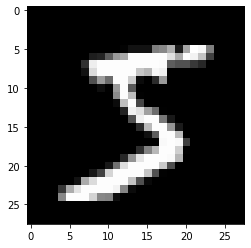

In [4]:
plt.imshow(trainX[0],cmap = 'gray')

In [5]:
trainY[0] # X 에는 사진, Y 에는 정수

5

In [6]:
trainX.min(),trainX.max()

(0, 255)

In [7]:
trainX = trainX / 255.0 # 뭐든 데이터를 0과 1 사이로 바꿔준다
testX = testX / 255.0

In [8]:
trainX.min(),trainX.max()


(0.0, 1.0)

In [9]:
trainX = trainX.reshape(-1,28*28)
testX = testX.reshape(-1,28*28)

In [10]:
trainX.shape, testX.shape, testX.min(), testX.max()

((60000, 784), (10000, 784), 0.0, 1.0)

Change label to one-hot encoder

In [11]:
trainY[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [13]:
trainY[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [14]:
testY[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Define the 784-256-128-10 architecture using Keras

In [15]:
model = Sequential()

In [16]:
model.add(Dense(256,activation = 'sigmoid', input_shape = (784,)))
model.add(Dense(128,activation = 'sigmoid'))
model.add(Dense(10,activation = 'softmax'))

In [19]:
model.summary

Train the model usign SGD

In [21]:
sgd = SGD(0.01)
model.compile(loss= 'categorical_crossentropy',  
              optimizer=sgd,
              metrics=["accuracy"])    # 이건 10개로 분류여서 categorical-crossentropy

In [22]:
H = model.fit(trainX, trainY, validation_data = (testX,testY), epochs = 100, batch_size = 64,verbose = 1)

Epoch 1/100
938/938 [==============================] - 2s 2ms/step - loss: 2.2485 - accuracy: 0.2706 - val_loss: 2.1718 - val_accuracy: 0.4189
Epoch 2/100
938/938 [==============================] - 2s 2ms/step - loss: 2.0666 - accuracy: 0.5137 - val_loss: 1.9219 - val_accuracy: 0.5946
Epoch 3/100
938/938 [==============================] - 2s 2ms/step - loss: 1.7348 - accuracy: 0.6233 - val_loss: 1.5147 - val_accuracy: 0.6607
Epoch 4/100
938/938 [==============================] - 2s 2ms/step - loss: 1.3325 - accuracy: 0.7017 - val_loss: 1.1455 - val_accuracy: 0.7300
Epoch 5/100
938/938 [==============================] - 2s 2ms/step - loss: 1.0296 - accuracy: 0.7571 - val_loss: 0.9069 - val_accuracy: 0.7801
Epoch 6/100
938/938 [==============================] - 2s 2ms/step - loss: 0.8395 - accuracy: 0.7973 - val_loss: 0.7567 - val_accuracy: 0.8158
Epoch 7/100
938/938 [==============================] - 2s 2ms/step - loss: 0.7163 - accuracy: 0.8243 - val_loss: 0.6555 - val_accuracy: 0.8372

Evaluate the trained network

In [24]:
model.evaluate(testX,testY, batch_size = 64)

157/157 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9406


[0.20101432502269745, 0.9405999779701233]

In [25]:
predictions = model.predict(testX, batch_size = 64)

Use `classification_report` to measure the performance of your model.

In [28]:
print(classification_report(testY.argmax(axis = 1),
                            predictions.argmax(axis = 1)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.93      0.93      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.90      0.91       892
           6       0.93      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.92      0.92       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Plot the training loss and accuracy

In [29]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

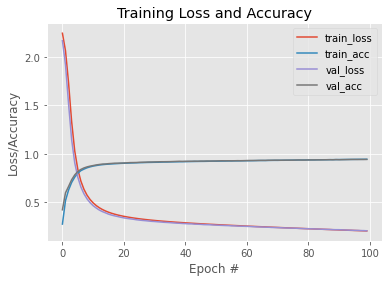

In [32]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0,100),H.history['loss'],label = 'train_loss')
plt.plot(np.arange(0,100),H.history['accuracy'],label = 'train_acc')
plt.plot(np.arange(0,100),H.history['val_loss'],label = 'val_loss')
plt.plot(np.arange(0,100),H.history['val_accuracy'],label = 'val_acc')

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()